Sr No. 1

Project Name:- Credit Card Fraud Detection

In [2]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\\Desktop\\Codeclause\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values find

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
df.Class.count()

284807

1) total transactions happen is --> 284807
2) Here '0' indicates -> Non fraud transactions
3) And '1' indicates -> Fraud transactions

In [11]:
trnsctn = df.Class.value_counts(normalize=True)*100
trnsctn.index = ["Non fraud", "fraud"]
print(trnsctn)

Non fraud    99.827251
fraud         0.172749
Name: Class, dtype: float64


Here we can see that 99.82% are Non fraud and only 0.17% are fraud transactions

Below we can visualize the difference

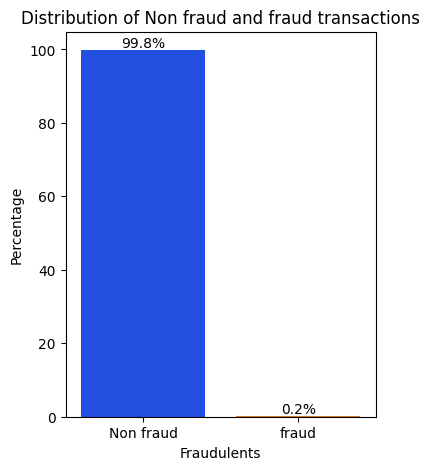

In [12]:
plt.figure(figsize=(4,5))
trn = sns.barplot(x= trnsctn.index, y= trnsctn, palette= "bright")
plt.xlabel("Fraudulents")
plt.ylabel("Percentage")
plt.title("Distribution of Non fraud and fraud transactions")
trn.bar_label(trn.containers[0], fmt = '%.1f%%')
plt.show()

Let us check any temporary dependency based on time

In [13]:
df_time = df[["Time","Class"]]
df_time.head()

,Time,Class
0,0.0,0
1,0.0,0
2,1.0,0
3,1.0,0
4,2.0,0


In [14]:
non_fraud_data = df_time[[i for i in df_time.Class == 0]]
fraud_data = df_time[[j for j in df_time.Class == 1]]

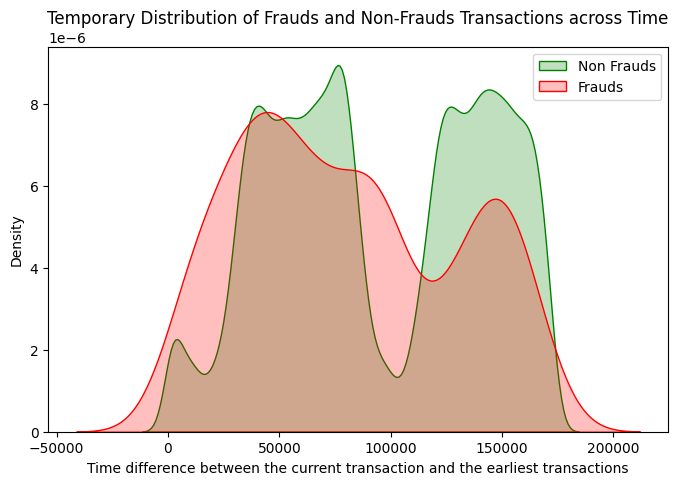

In [15]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green']

sns.kdeplot(non_fraud_data['Time'], color=colors[1], label='Non Frauds', fill=True)
sns.kdeplot(fraud_data['Time'], color=colors[0], label='Frauds', fill=True)
plt.xlabel('Time difference between the current transaction and the earliest transactions')
plt.ylabel('Density')
plt.title('Temporary Distribution of Frauds and Non-Frauds Transactions across Time')
plt.legend()
plt.show()

By seeing above graph there is no usefill info finds

Let us check with amount

In [16]:
df_amt = df[["Amount", "Class"]]
df_amt

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
...,...,...
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0


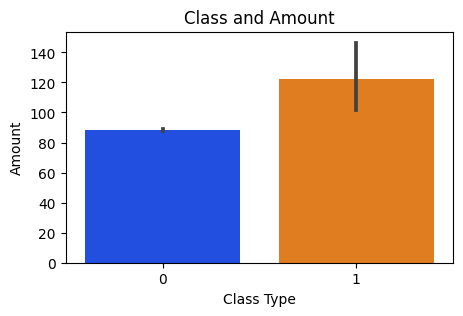

In [32]:
plt.figure(figsize=(5, 3))
sns.barplot(x= df_amt["Class"],y= df_amt["Amount"], palette= "bright")
plt.xlabel("Class Type")
plt.ylabel("Amount")
plt.title("Class and Amount")
plt.show()


## Model Testing and Training

In [33]:
# Importing libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Spliting the data

In [37]:
X = df.drop('Class', axis= 1)
y = df['Class']
# print(x.head())
# print(y.head())

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 50)

In [41]:
sclr = StandardScaler()
X_train['Amount'] = sclr.fit_transform(X_train[['Amount']])

In [43]:
# X_train.head()

In [45]:
X_test['Amount'] = sclr.transform(X_test[['Amount']])
# X_test.head()

Skewness

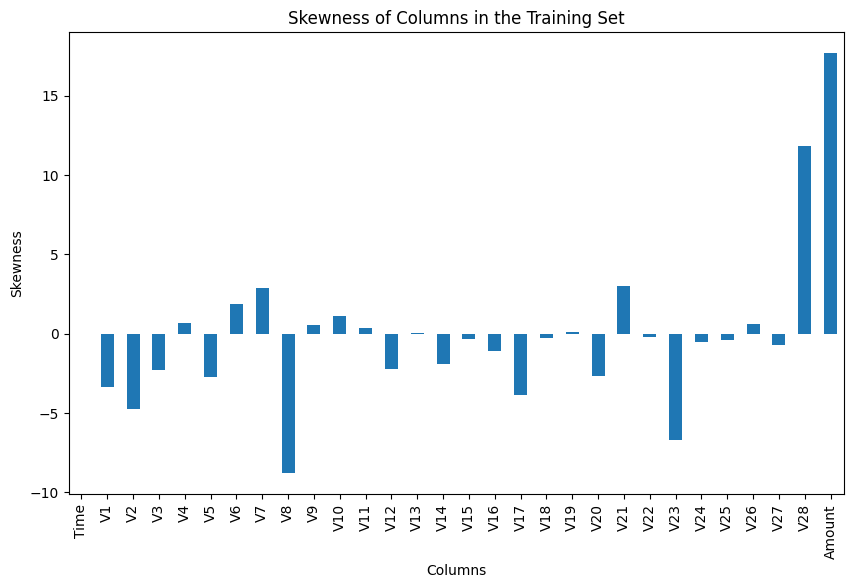

In [46]:
skewness_train = X_train.skew()


# Create a bar plot of the skewness values
plt.figure(figsize=(10, 6))
skewness_train.plot(kind='bar')
plt.title("Skewness of Columns in the Training Set")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.show()

By above graph we can see that Many variables are highly skewed

In [50]:
columns = X_train.columns

In [51]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[columns] = pt.fit_transform(X_train[columns])

In [52]:
# Transform the test data 
X_test[columns] = pt.transform(X_test[columns])

In [53]:
import scipy.stats as stats

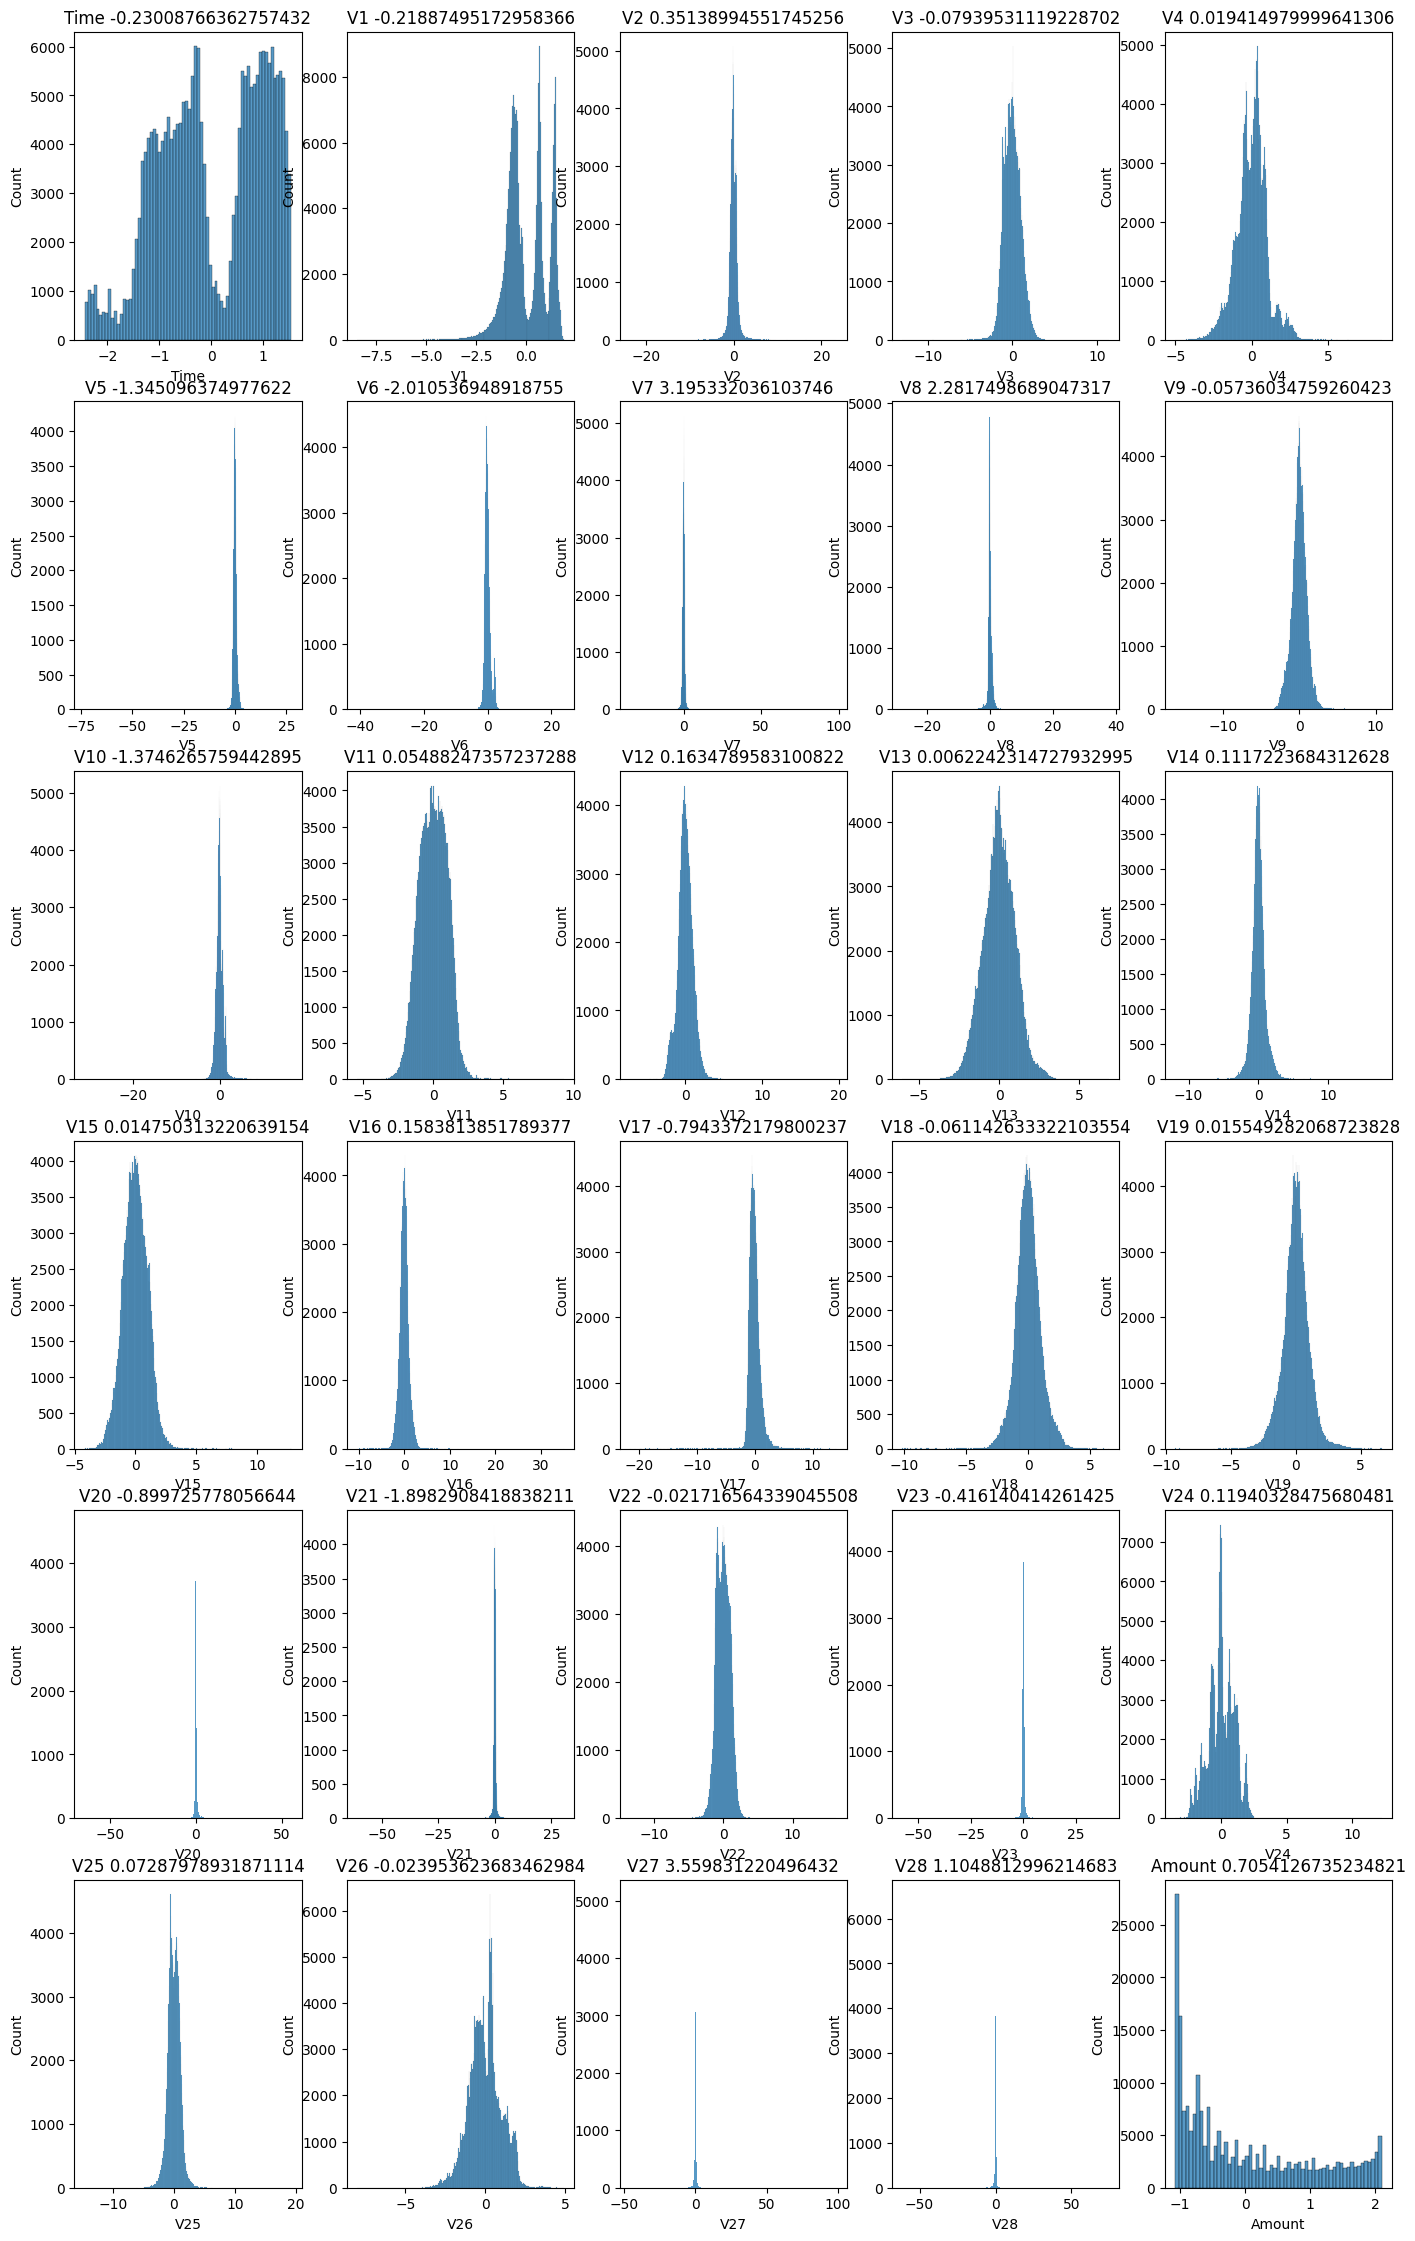

In [55]:
k=0
plt.figure(figsize=(17,28))
for column in columns :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.histplot(X_train[column])
    plt.title(column+' '+str(X_train[column].skew()))

All variables are normally distributed after transformation

# Logistic Regression

In [57]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.565146,0.079453,0.014829,0.001755,0.01,{'C': 0.01},0.981751,0.973939,0.976510,0.971928,...,0.976565,0.003460,1,0.979171,0.983583,0.983399,0.983141,0.982201,0.982299,0.001635
1,0.823151,0.228026,0.018000,0.006789,0.1,{'C': 0.1},0.982512,0.970994,0.976196,0.970857,...,0.974864,0.004302,2,0.978329,0.982804,0.982330,0.982575,0.981824,0.981572,0.001654
2,0.827390,0.245859,0.013112,0.002009,1,{'C': 1},0.982434,0.970417,0.975210,0.970248,...,0.974101,0.004532,3,0.977897,0.982289,0.981871,0.982183,0.981502,0.981149,0.001649
3,0.943865,0.198479,0.017847,0.006457,10,{'C': 10},0.982410,0.970351,0.975063,0.970167,...,0.974000,0.004557,4,0.977843,0.982226,0.981814,0.982132,0.981462,0.981095,0.001648
4,0.868158,0.157750,0.013996,0.002441,100,{'C': 100},0.982408,0.970347,0.975051,0.970159,...,0.973989,0.004560,5,0.977837,0.982219,0.981809,0.982126,0.981456,0.981089,0.001648
5,0.971259,0.298220,0.015245,0.004197,1000,{'C': 1000},0.982410,0.970345,0.975048,0.970158,...,0.973989,0.004561,6,0.977837,0.982218,0.981809,0.982126,0.981456,0.981089,0.001648


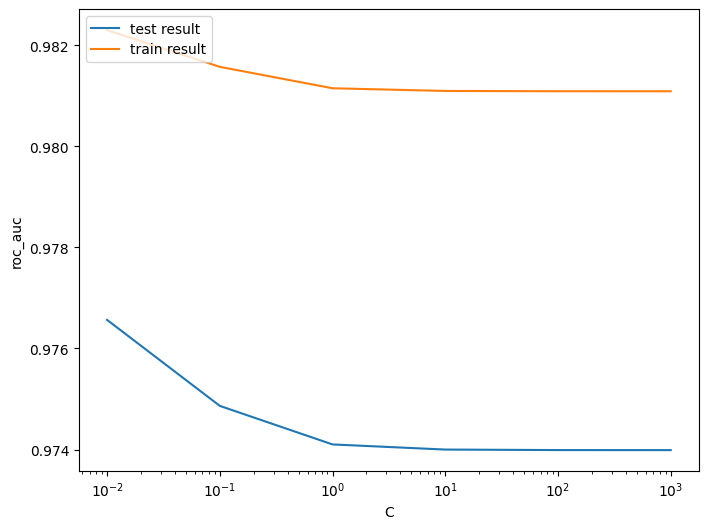

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [60]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9765653964801606 at C = 0.01


Logistic regression with optional C

In [61]:
logistic_imb = LogisticRegression(C=0.01)
logistic_imb_model = logistic_imb.fit(X_train, y_train)
y_train_pred = logistic_imb_model.predict(X_train)

Confussion Matrix

In [62]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227413     28]
 [   137    267]]


In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992758234764862
Sensitivity:- 0.6608910891089109
Specificity:- 0.9998768911497927
F1-Score:- 0.7639484978540773


In [65]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       0.91      0.66      0.76       404

    accuracy                           1.00    227845
   macro avg       0.95      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



### Train ROC

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

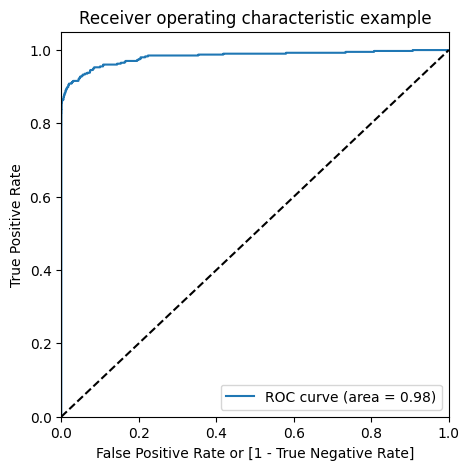

In [68]:
draw_roc(y_train, y_train_pred_proba)

ROC Curve is 0.98

### Prediction

In [69]:
y_test_pred = logistic_imb_model.predict(X_test)

In [70]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56860    14]
 [   37    51]]


In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991046662687406
Sensitivity:- 0.5795454545454546
Specificity:- 0.9997538418257903
F1-Score:- 0.6666666666666667


In [73]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.78      0.58      0.67        88

    accuracy                           1.00     56962
   macro avg       0.89      0.79      0.83     56962
weighted avg       1.00      1.00      1.00     56962



Test ROC

In [74]:
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

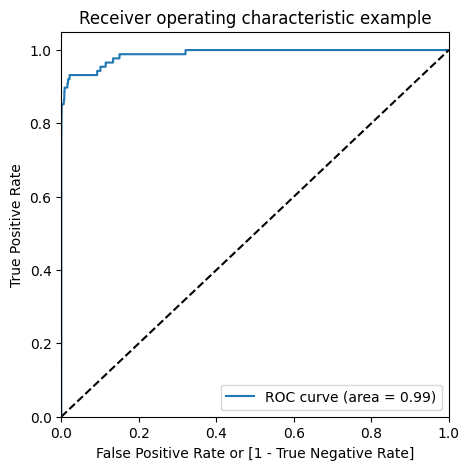

In [75]:
draw_roc(y_test, y_test_pred_proba)

ROC on test data is 0.99 very close to 1

### Summary

Train Set:- 
Accuracy:- 0.9992758234764862

Sensitivity:- 0.6608910891089109

Specificity:- 0.9998768911497927

F1-Score:- 0.7639484978540773

Test Set:-

Accuracy:- 0.9991046662687406

Sensitivity:- 0.5795454545454546

Specificity:- 0.9997538418257903

F1-Score:- 0.6666666666666667

### Model Performing well on this Data